# **TTI109 - Estatística**
# **Aula 11 - Distribuição Normal de Probabilidade 01**

Nessa aula vamos aprender a:

* Identificar distribuições normais de probabilidade;
* Estimar média e desvio padrão de uma distribuição normal;
* Padronizar uma distribuição normal usando escores-z;
* Empregar tabelas de distribuição normal padrão para determinar probabilidades;
* Empregar a ferramenta Python como alternativa ao uso das tabelas de distribuição normal padrão.

## **A curva normal**
Uma distribuição normal de probabilidade é completamente definida pelos dois parâmetros de sua função densidade de probabilidade: a média $\mu$ e o desvio padrão $\sigma$:

\begin{align}
        \text{fdp}(x)=\mathscr{N}(x)=\frac{1}{\sigma\sqrt{2\pi}}\text{exp}\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

No Python, usaremos o método `pdf` *(probability density function)* da classe `stats.norm` (biblioteca `scipy`).

In [2]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## **Plotando uma curva normal**

In [3]:
# Criação de uma distribuição normal com média 1.5 e desvio padrão 2.0
media, desvpad = 1.5, 2.0
distnorm = norm(media, desvpad)

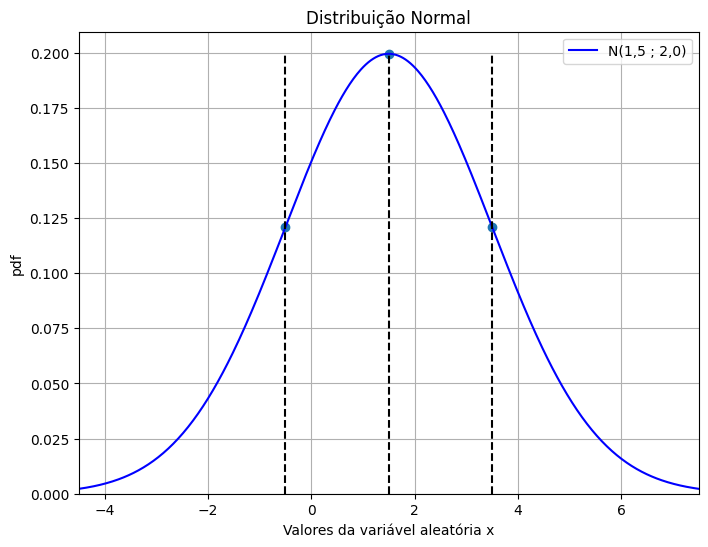

In [4]:
## Representação gráfica

# Geração de QUANT pontos no intervalo entre INICIO e FIM
QUANT, INICIO, FIM = 500, media-3*desvpad, media+3*desvpad
x = np.linspace(INICIO, FIM, QUANT)

# Cálculo da fdp normal para os valores do vetor x
y = distnorm.pdf(x)

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b', label='N(1,5 ; 2,0)')
plt.xlim(INICIO, FIM)
plt.ylim(0, distnorm.pdf(media)+0.01)
plt.title('Distribuição Normal')
plt.xlabel('Valores da variável aleatória x')
plt.ylabel('pdf')
pts = [media - desvpad, media, media + desvpad]
plt.scatter(pts, distnorm.pdf(pts))
plt.vlines(pts, 0, distnorm.pdf(media), colors='k', linestyles='dashed')
plt.grid()
plt.legend()
plt.show()

## **Plotando várias distribuições normais**

In [5]:
# Médias e desvios padrão
medias = [-2, 0, 3, 6]
desvios = [0.75, 1, 3, 1.5]

# Cores das curvas: preto, verde, azul e vermelho
cores = ['k', 'g', 'b', 'r']

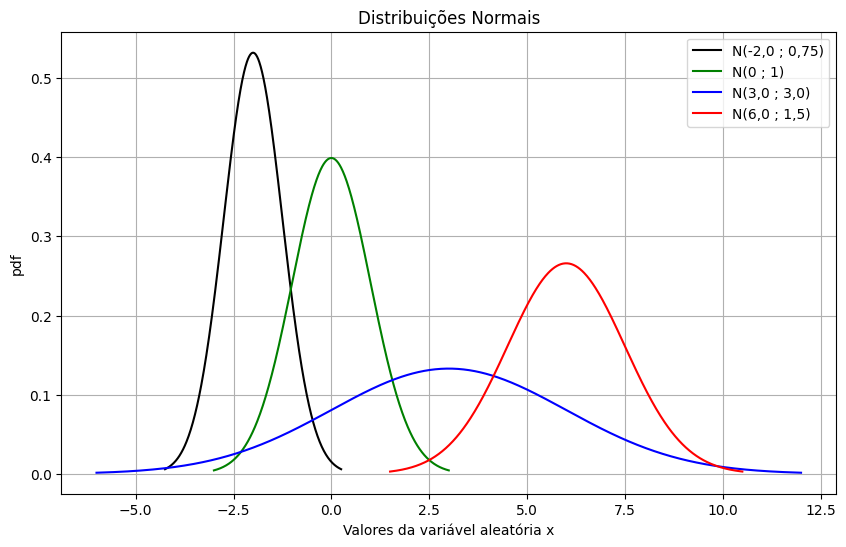

In [6]:
# Tamanho da figura
plt.figure(figsize=(10, 6))

# Plotagem dos gráficos
for mu, std, cor in zip(medias, desvios, cores):
  normal = norm(mu, std)
  QUANT, INICIO, FIM = 500, mu-3*std, mu+3*std
  x = np.linspace(INICIO, FIM, QUANT)
  y = normal.pdf(x)
  plt.plot(x, y, cor)

# Atributos do gráfico
plt.title('Distribuições Normais')
plt.xlabel('Valores da variável aleatória x')
plt.ylabel('pdf')
plt.legend(['N(-2,0 ; 0,75)', 'N(0 ; 1)', 'N(3,0 ; 3,0)', 'N(6,0 ; 1,5)'])
plt.grid(True)
plt.show()


## **Probabilidades na curva normal padrão**

*   Encontre a área acumulada que corresponde a um escore-z de –2,19.
*   Encontre a área acumulada que corresponde a um escore-z de 2,17.
*   Encontre a área sob a curva normal padrão à direita de z = 1,06.
*   Encontre a área sob a curva normal padrão entre z = –1,5 e z = 1,25.




Usaremos os métodos `cdf` *(Cumulative distribution function)* para áreas à esquerda de um escore-z e `sf` *(Survival function, definida como sf = 1 - cdf)* para áreas à direita.

In [7]:
# Definição da distribuição normal padrão
media, std = 0, 1
normpad = norm(media, std)

In [8]:
# Área acumulada que corresponde a um escore-z de –2,19
area1 = normpad.cdf(-2.19)
print(f'A área acumulada correspondente a z = -2.19 é {area1:.4f}.')
print(f'P(z <= -2.19) = {area1*100:.2f}%.')

A área acumulada correspondente a z = -2.19 é 0.0143.
P(z <= -2.19) = 1.43%.


In [9]:
# Área acumulada que corresponde a um escore-z de 2,17
area2 = normpad.cdf(2.17)
print(f'A área acumulada correspondente a z = 2.17 é {area2:.4f}.')
print(f'P(z <= 2.17) = {area2*100:.2f}%.')

A área acumulada correspondente a z = 2.17 é 0.9850.
P(z <= 2.17) = 98.50%.


In [10]:
# Área sob a curva normal padrão à direita de z = 1,06
area3 = normpad.sf(1.06) # Isso equivale a area3 = 1 - normpad.cdf(1.06)
print(f'A área sob a curva normal à direita de z = 1.06 é {area3:.4f}.')
print(f'P(z > 1.06) = {area3*100:.2f}%.')

A área sob a curva normal à direita de z = 1.06 é 0.1446.
P(z > 1.06) = 14.46%.


In [11]:
# Área sob a curva normal padrão entre z = –1,5 e z = 1,25
area4 = normpad.cdf(1.25) - normpad.cdf(-1.5)
print(f'A área sob a curva normal entre z = -1.5 e z = 1.25 é {area4:.4f}.')
print(f'P(-1.5 <= z <= 1.25) = {area4*100:.2f}%.')

A área sob a curva normal entre z = -1.5 e z = 1.25 é 0.8275.
P(-1.5 <= z <= 1.25) = 82.75%.


## **Exercício 01**

A velocidade média dos veículos que passam em um trecho de uma rodovia é 67 milhas por hora, com desvio padrão de 3,5 milhas por hora.

Um veículo é selecionado de forma aleatória. Qual é a probabilidade de que ele esteja ultrapassando o limite de velocidade de 70 milhas por hora? Suponha que as velocidades são normalmente distribuídas.

In [12]:
media, std = 67, 3.5
LIMITE = 70
velocidades = norm(loc=media, scale=std)
prob = velocidades.sf(LIMITE)
print(f'A probabilidade de ultrapassar o limite de {LIMITE} mi/h é de {100*prob:.2f}%.')

A probabilidade de ultrapassar o limite de 70 mi/h é de 19.57%.


## **Exercício 02**

Uma pesquisa indica que, para cada ida ao supermercado, um consumidor permanece na loja em média 45 minutos, com desvio padrão de 12 minutos. A duração dos tempos gastos na loja é normalmente distribuída. Um consumidor entra na loja.

(a) Calcule a probabilidade de que ele ficará na loja:
*   Entre 24 e 54 minutos
*   Mais que 39 minutos

(b) Suponha que 200 consumidores entraram na loja. Quantos deles você esperaria que estivessem na loja para cada intervalo de tempo do item (a)?



In [13]:
# Criação da distribuição normal
media, std = 45, 12
compras = norm(loc=media, scale=std)

In [14]:
# Item (a)
print('A probabilidade de que um consumidor esteja na loja:')
prob1 = compras.cdf(54) - compras.cdf(24)
print(f'- entre 24 e 54 min é de {prob1*100:.2f}%')
prob2 = compras.sf(39)
print(f'- por mais de 39 min é de {prob2*100:.2f}%')

A probabilidade de que um consumidor esteja na loja:
- entre 24 e 54 min é de 73.33%
- por mais de 39 min é de 69.15%


In [15]:
# Item (b)
print('Se 200 consumidores entrarem na loja, espera-se que:')
print(f'\t{round(200*prob1)} permaneçam na loja entre 24 e 54 min')
print(f'\t{round(200*prob2)} permaneçam por mais de 39 min')

Se 200 consumidores entrarem na loja, espera-se que:
	147 permaneçam na loja entre 24 e 54 min
	138 permaneçam por mais de 39 min


## **Amostragens de distribuições normais**

Nesse exemplo, vamos retirar 1000 amostras de uma distribuição normal de média $0,5$ e desvio padrão $0,1$. Para isso, usaremos a função `random.normal` do `numpy`.

A seguir, construímos um histograma a partir dessas amostras e checamos como a distribuição teórica se encaixa nesse caso concreto.

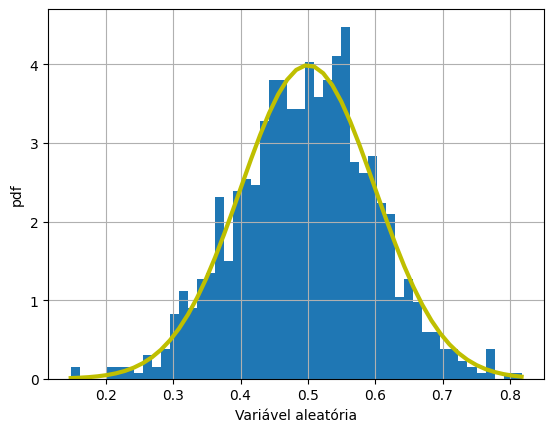

In [16]:
# Coletando 1000 amostras de uma distribuição N(0,5 ; 0,1)
media, desvpad = 0.5, 0.1
amostras = np.random.normal(loc=media, scale=desvpad, size=1000)

# Criando classes (bins) e um histograma
contagem, bins, ignored = plt.hist(amostras, 50, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(desvpad * np.sqrt(2 * np.pi)) * np.exp(- (bins - media)**2 / (2 * desvpad**2) ),
         linewidth=3, color='y')
plt.grid()
plt.xlabel('Variável aleatória')
plt.ylabel('pdf')
plt.show()

## **Estudo de caso - Altura dos pinguins imperador**

*Adaptado de:* https://proclusacademy.com/blog/practical/normal-distribution-python-scipy/

Pinguins imperador são os mais altos dentre todas as espécies de pinguins. Vamos supor que a altura dos pinguins imperador seja normalmente distribuída com média de $40''$ e desvio padrão de $5''$.

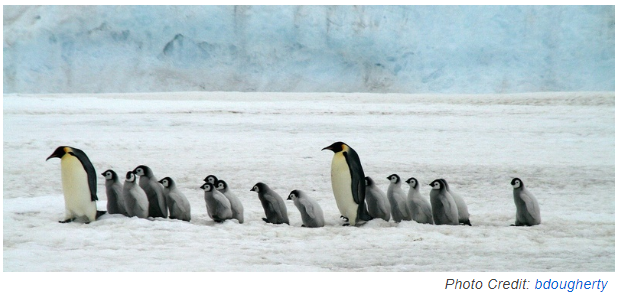


In [17]:
# Estatística da altura dos pinguins imperador (em polegadas)
media = 40
desvpad = 5

# Criação da distribuição normal
dist_altura = norm(loc=media, scale=desvpad)

Suponha que, para um certo estudo, precisamos de uma amostra de 20 alturas selecionadas aleatoriamente. Podemos obtê-las com o método `rvs()` da classe `stats.norm` (essa é uma alternaticva ao método de amostragem usando no exemplo anterior).

In [18]:
# Geração de uma amostra com 20 elementos
amostra = dist_altura.rvs(size=20)
amostra.round(2)

array([43.05, 45.14, 37.45, 41.79, 40.01, 46.44, 39.25, 46.11, 37.05,
       35.25, 39.44, 34.89, 44.3 , 39.98, 35.84, 36.35, 39.18, 43.17,
       41.78, 41.19])

As amostras das alturas dos pinguins parecem razoávies. Mas, será que o método `rvs()` está de fato gerando valores normalmente distribuídos?

Para confirmar essa hipótese, vamos gerar uma amostra bem maior (3000 elementos) e plotar um histograma.

In [19]:
# Geração de uma amostra com 3000 elementos
amostra = dist_altura.rvs(size=3000, random_state=10)

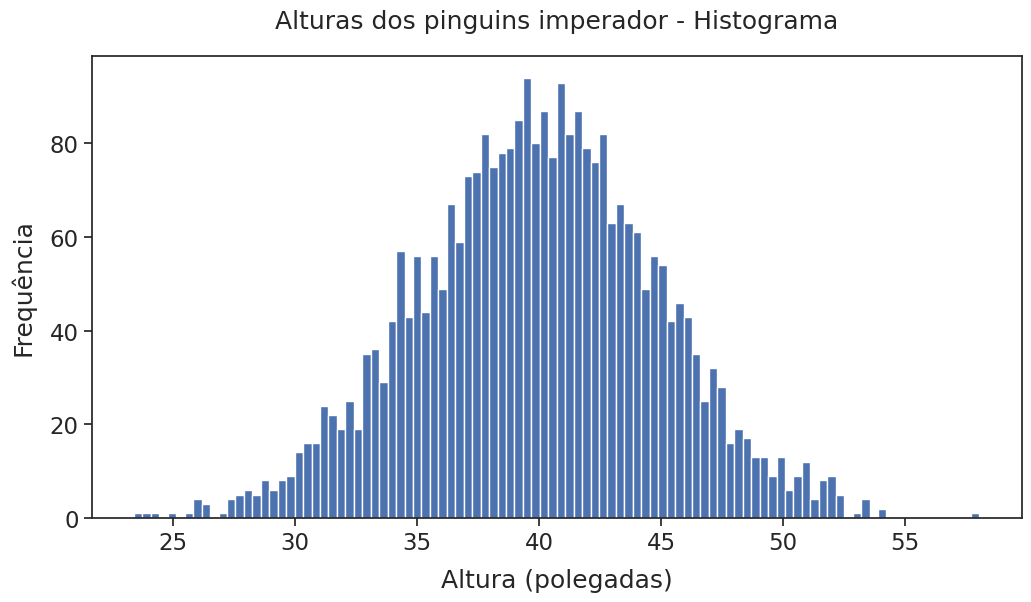

In [20]:
# Plotagem das amostras de altura no formato de histograma
import seaborn as sns

# Configurações de estilo e tamanho de figura
sns.set_theme(style='ticks', font_scale=1.5)
plt.figure(figsize=(12, 6))

# Plotagem do histograma (com bins=100, para um formato mais suave)
plt.hist(amostra, bins=100)
plt.title("Alturas dos pinguins imperador - Histograma", pad=20)
plt.xlabel("Altura (polegadas)", labelpad=10)
plt.ylabel("Frequência", labelpad=10)
plt.show()

Os valores gerados são de fato distribuídos normalmente! As alturas da maioria dos pinguins estão agrupadas em torno da média (40 polegadas). E a frequência diminui à medida que a altura se afasta da média em qualquer direção.

Agora, desejamos responder à questão:

*Qual a probabilidade de que um pinguim imperador selecionado aleatoriamente tenha uma altura de exatamente $40''$?*

O método `pdf()` (*Probability Density Function - Função Densidade de Probabilidade*) da classe `stats.norm` nos auxilia nesse caso. Ele retorna a probabilidade associada a um valor específico de uma variável aleatória normalmente distribuída.

In [21]:
# Probabilidade de que um pinguim imperador tenha altura de 40 polegadas
prob_40 = dist_altura.pdf(x=40)
print(f'P(x=40) = {prob_40*100:.2f}%')

P(x=40) = 7.98%


Uma curva de densidade é um gráfico que mostra probabilidades associadas a diferentes valores de uma variável. Vamos usar `pdf()` para traçar a curva de densidade para a altura dos pinguins.

Primeiro, escolheremos 1000 medidas de altura entre $20''$ e $60''$. Podemos fazer isso usando `linspace()` do `numpy`.

In [22]:
# Gerando 1000 alturas igualmente espaçadas entre 20 e 60 polegadas
elementos = 1000
alt_min = 20
alt_max = 60
alturas = np.linspace(alt_min, alt_max, num=elementos)

# Alguns valores, para checagem
print(f'Contagem dos valores de altura: {alturas.size}')
print(f'10 primeiros valores: {alturas[:10].round(2)}')
print(f'10 últimos valores: {alturas[-10:].round(2)}')

Contagem dos valores de altura: 1000
10 primeiros valores: [20.   20.04 20.08 20.12 20.16 20.2  20.24 20.28 20.32 20.36]
10 últimos valores: [59.64 59.68 59.72 59.76 59.8  59.84 59.88 59.92 59.96 60.  ]


A seguir, calculamos as probabilidades para todos os valores do vetor `alturas`, usando o método `pdf()`.

In [23]:
# Cálculo das probabilidades
probabilidades = dist_altura.pdf(x=alturas)

Finalizando, plotamos as alturas no eixo das abscissas e as probabilidades correspondentes no eixo das ordenadas. Essa representação é a curva de densidade.

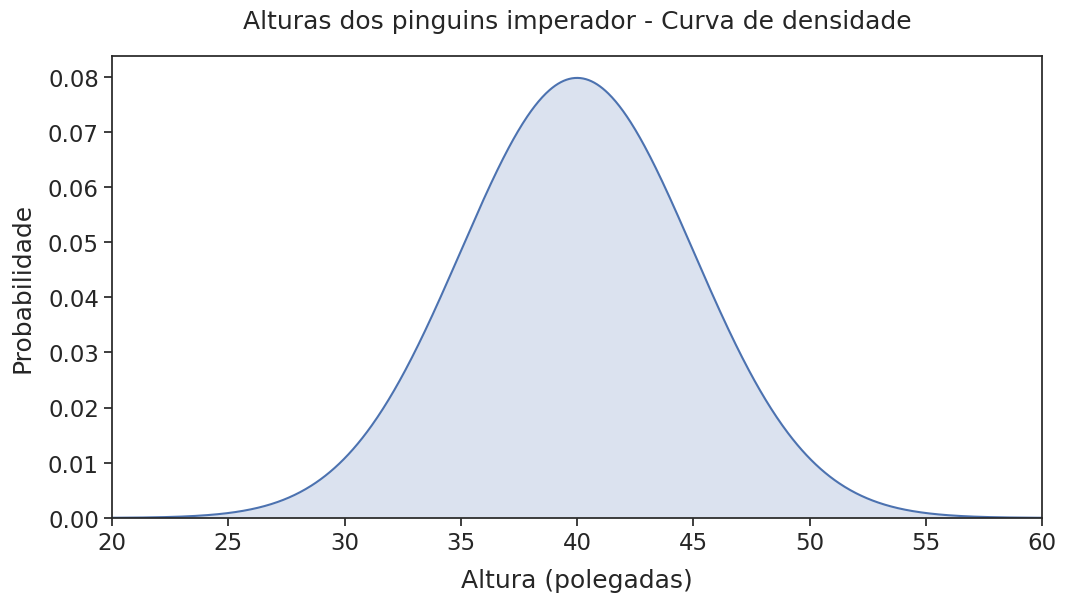

In [24]:
# Tamanho da figura
plt.figure(figsize=(12, 6))

# Curva de densidade: alturas nas abscissas e probabilidades nas ordenadas
plt.plot(alturas, probabilidades)

# Preenchimento da área sob a curva de densidade
plt.fill_between(alturas, probabilidades, alpha=0.2)

# Propriedades da figura
axes = plt.gca()
axes.set_xlim([alt_min, alt_max])
ymin, ymax = axes.get_ylim()
axes.set_ylim([0, ymax])

# Título e nomes dos eixos
plt.title("Alturas dos pinguins imperador - Curva de densidade", pad=20)
plt.xlabel("Altura (polegadas)", labelpad=10)
plt.ylabel("Probabilidade", labelpad=10)
plt.show()

Suponha que desejamos saber:

*Qual a percentagem de pinguins imperador que tem alturas inferiores à $44''$?*

Para responder à essa questão, devemos somar as probabilidades de ocorrência de todas as alturas inferiores à $44''$. O método `cdf()` (*Cumulative Distribution Function - Função Distribuição Acumulada*) da classe `stats.norm` faz exatamente isso. De modo geral, o método calcula a proporção de uma população normalmente distribuída que possui certa característica representada por um valor menor ou igual a um certo valor de teste.

In [25]:
# Percentagem de pinguins imperador mais baixos do que 44 polegadas
abaixo_44 = dist_altura.cdf(44)
print(f'P(x <= 44) = {100*abaixo_44:.2f}%')

P(x <= 44) = 78.81%


Como vios anteriormente, o eixo das abscissas da curva de densidade registra as alturas em ordem crescente. Vamos realçar a região da curva na qual as alturas dos pinguins são menores ou iguais a $44''$, empregando a função `fill_between()` da classe `matplotlib`.

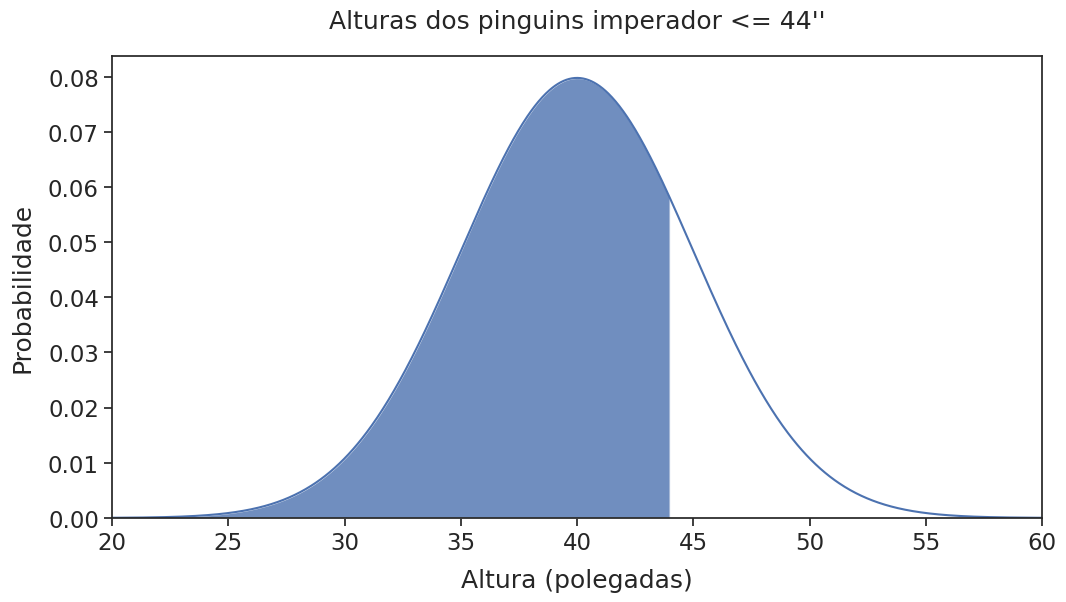

In [28]:
# Tamanho da figura
plt.figure(figsize=(12, 6))

# Curva de densidade: alturas nas abscissas e probabilidades nas ordenadas
plt.plot(alturas, probabilidades)

# Preenchimento da região em que altura <= 44 polegadas

regiao =  (alturas <= 44)
plt.fill_between(alturas, probabilidades, where=regiao, alpha=0.8)

# Propriedades da figura
axes = plt.gca()
axes.set_xlim([alt_min, alt_max])
ymin, ymax = axes.get_ylim()
axes.set_ylim([0, ymax])

# Título e nomes dos eixos
plt.title("Alturas dos pinguins imperador <= 44''", pad=20)
plt.xlabel("Altura (polegadas)", labelpad=10)
plt.ylabel("Probabilidade", labelpad=10)
plt.show()

A região realçada representa a soma das probabilidades das alturas dos pinguins imperador que são menores ou iguais a $44''$. Já determinamos essa soma usando a função `cdf()` (célula de código anterior).

Portanto, a área sombreada equivale a $78,81\%$ da área total abaixo da curva de densidade (que vale $1$).